На сликата подолу е прикажан дел од ЕР дијаграм за организација на универзитети и мобилност на студенти и вработени.  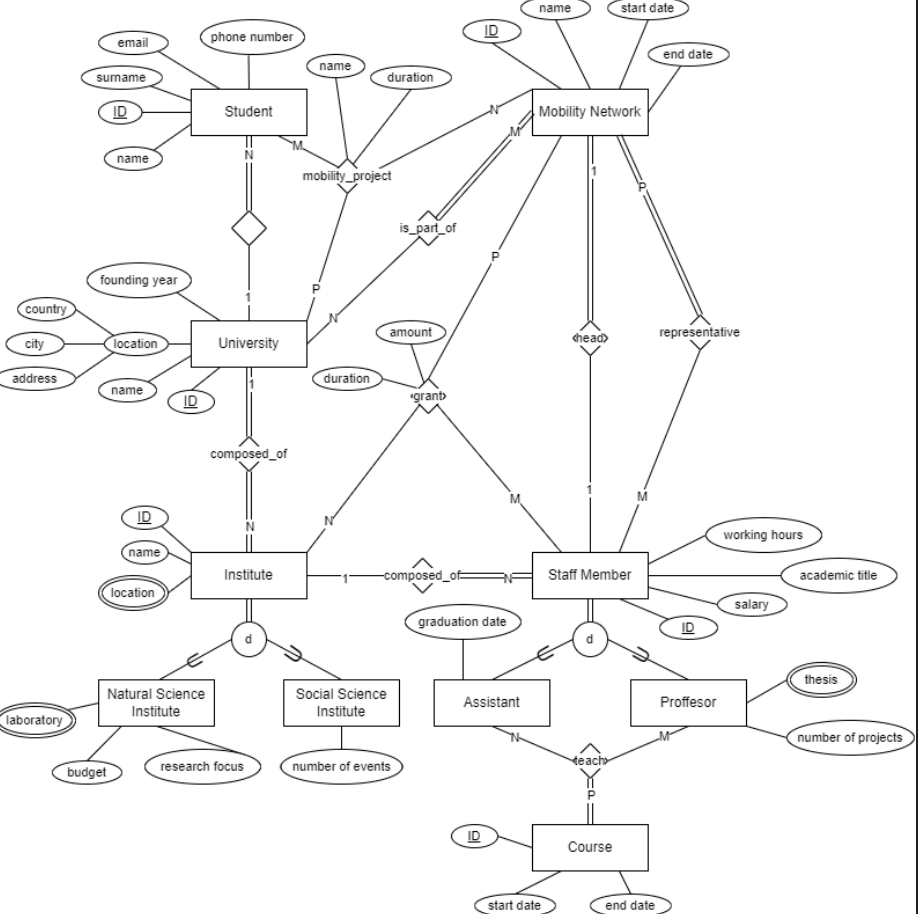

Релационата база е дефинирана преку следните релации: University(id, name, founding\_year, country, city, address)  
Institute(id, name, university\_id\*)  
Institute\_Location(institute\_id\*, location)  
Natural\_Science\_Institute(institute\_id\*, budget, research\_focus)  
NSI\_Laboratory(institute\_id\*, laboratory)  
Social\_Science\_Institute(institute\_id\*, number\_of\_events)  
Staff\_Member(id, academic\_title, salary, working\_hours, institute\_id\*)  
Assistant(sm\_id\*, graduation\_date)  
Professor(sm\_id\*, number\_of\_projects)  
Professor\_Thesis(sm\_id\*, thesis)  
Course(id, start\_date, end\_date)  
Teach(professor\_id\*, assistant\_id\*, course\_id\*)  
Student(id, name, surname, email, phone\_number, university\_id\*)  
Mobility\_Network(id, name, start\_date, end\_date)  
Representative(staff\_id\*, network\_id\*)  
Head(staff\_id\*, network\_id\*)  
Grant(staff\_id\*, network\_id\*, institute\_id\*, amount, duration)  
Part\_of(university\_id\*, network\_id\*)

<span style="color: var(--vscode-foreground);">Mobility_Project(network_id*, student_id*, university_id*, name, duration)</span>

**1.**Да се напише DML израз со кој ќе се **излистаат име и презиме на студенти кои отишле на размена (Mobility Project) на универзитет кој се наоѓа во истиот град како и нивниот запишан универзитет****.**

In [ ]:
SELECT s.name, s.surname, uni.city
FROM Mobility_Project mp

JOIN Student s
    ON mp.student_id = s.id
JOIN University uni
    ON uni.id = s.university_id

WHERE instr(mp.name, uni.city)

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing
```
 | 
```
name        surname     city
----------  ----------  ----------
Marko       Markovski   Skopje
```
 | 
```
name        surname     city
----------  ----------  ----------
Marko       Markovski   Skopje
```
 |

2.Да се напише DML израз со кој ќе се **излистаат уникатни ID на сите лица од кадарот кои се „влијателни“. Едно лице е „влијателно„ ако исполнува барем еден од следните услови:**

- **Претставува раководител (Head) на мрежа на мобилност чие име започнува со „Horizon“.**
- **Претставува професор кој има плата поголема од 3000 и работи во природно - научен институт чиј буџет е над 1 милион.**

In [ ]:
SELECT stm.id as staff_id
FROM Staff_Member stm

JOIN Natural_Science_Institute ntsci
    ON ntsci.institute_id = stm.institute_id
JOIN Professor prof
    ON prof.sm_id = stm.id

WHERE stm.salary > 3000 AND ntsci.budget > 1000000

UNION

SELECT stm.id as staff_id
FROM Staff_Member stm

JOIN Head 
    ON Head.staff_id = stm.id
    
JOIN Mobility_Network mp
    ON mp.id = Head.network_id

WHERE mp.name LIKE ('Horizon%')

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|    | 
```
-- Testing
```
 | 
```
staff_id
----------
103
651
652
```
 | 
```
staff_id
----------
103
651
652
```
 |    |